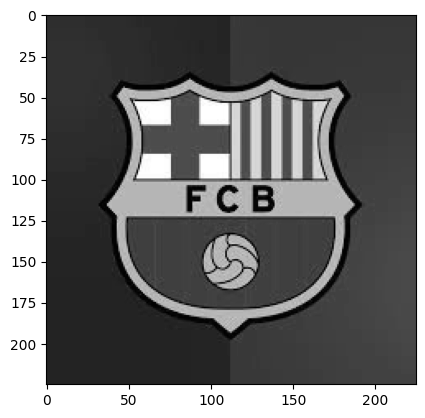

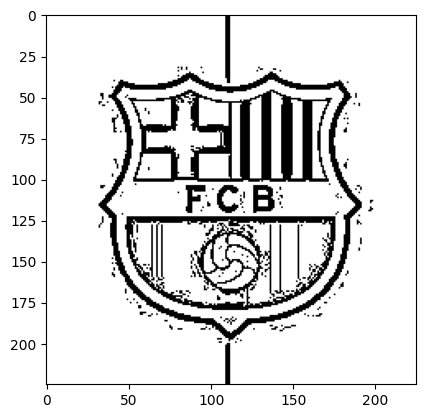

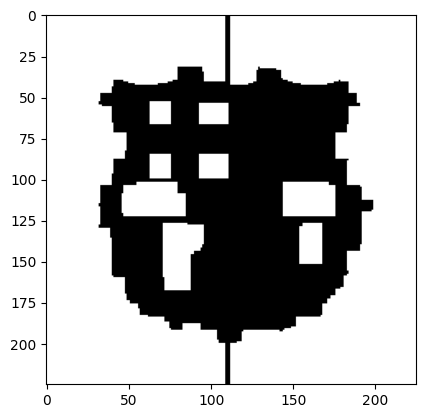

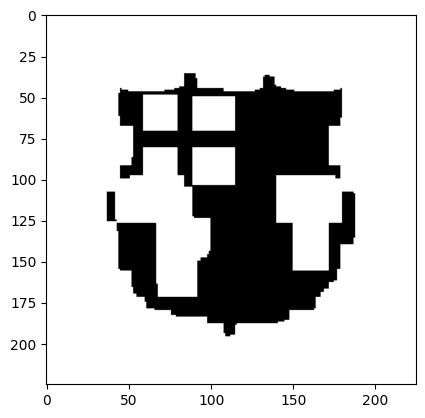

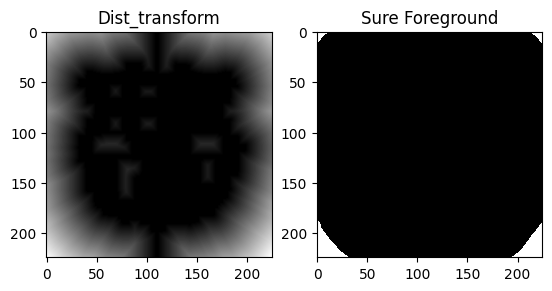

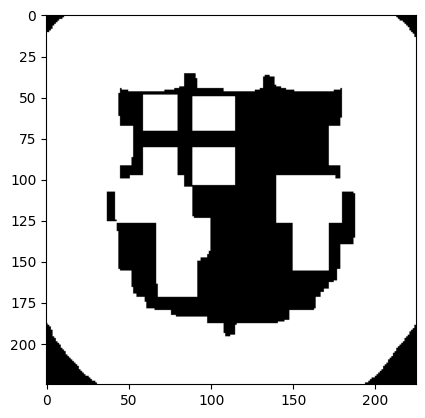

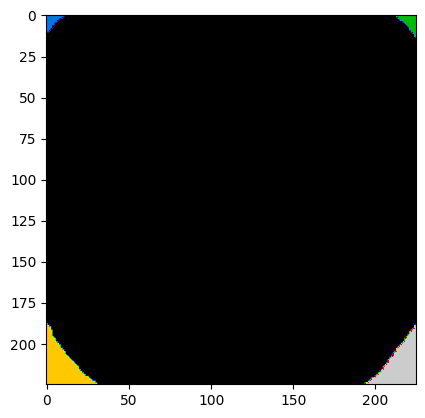

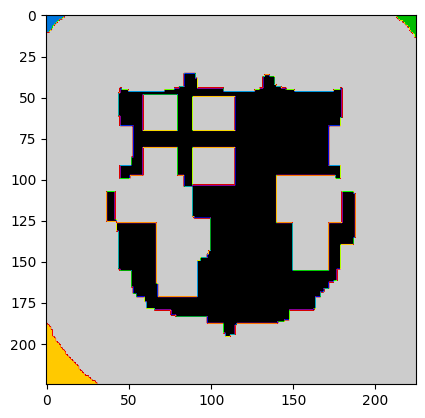

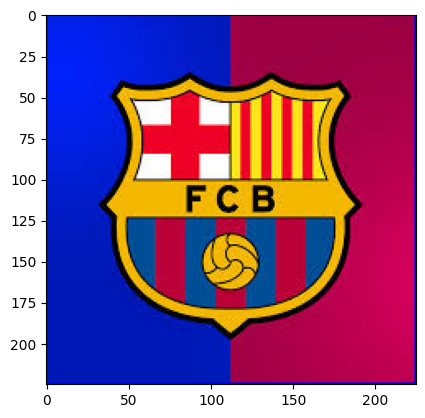

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an image from file
image = cv2.imread("FCB.jpg")

# Convert the image to RGB 
img_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.show()

# Image thresholding
Image_median = cv2.medianBlur(img_gray, 1)
threshold_value = 127  
ret, threshold_image = cv2.threshold(Image_median, threshold_value, 255, cv2.THRESH_BINARY_INV)
adaptive_threshold_image = cv2.adaptiveThreshold(Image_median, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(adaptive_threshold_image, cmap='gray')
plt.show()

# Noise Removal 
kernal = np.ones((3, 3), np.uint8)
opening_image = cv2.morphologyEx(adaptive_threshold_image, cv2.MORPH_OPEN, kernal, iterations=5)
plt.imshow(opening_image, cmap='gray')
plt.show()

# Sure Background Area
sure_bg = cv2.dilate(opening_image, kernal, iterations=4)
plt.imshow(sure_bg, cmap='gray')
plt.show()

# Finding Sure Foreground Area
dist_transform = cv2.distanceTransform(opening_image, cv2.DIST_L2, 5)
plt.subplot(1, 2, 1), plt.imshow(dist_transform, cmap='gray')
plt.title('Dist_transform')
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
plt.subplot(1, 2, 2), plt.imshow(sure_fg, cmap='gray')
plt.title('Sure Foreground')
plt.show()

# Finding Unknown Region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
plt.imshow(unknown, cmap='gray')
plt.show()

# Marker Labelling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
plt.imshow(markers, cmap='nipy_spectral')
plt.show()

# Marking Region of Unknown
markers[unknown == 255] = 5

# Display markers with unknown regions
plt.imshow(markers, cmap='nipy_spectral')
plt.show()
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]

# Display final image after watershed
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert back to RGB for proper display
plt.imshow(image)
plt.show()
